In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Decision Tree Classifier

In [24]:
wbc = pd.read_csv('data/wbc.csv')
wbc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [30]:
wbc.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [25]:
wbc = wbc.drop(['Unnamed: 32'], axis=1)

In [26]:
wbc['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [31]:
X = wbc[['radius_mean', 'concave points_mean']]
y = wbc['diagnosis']

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1, stratify=y)
dt = DecisionTreeClassifier(max_depth = 2, random_state = 1)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
accuracy_score(y_test,y_pred)

0.9035087719298246

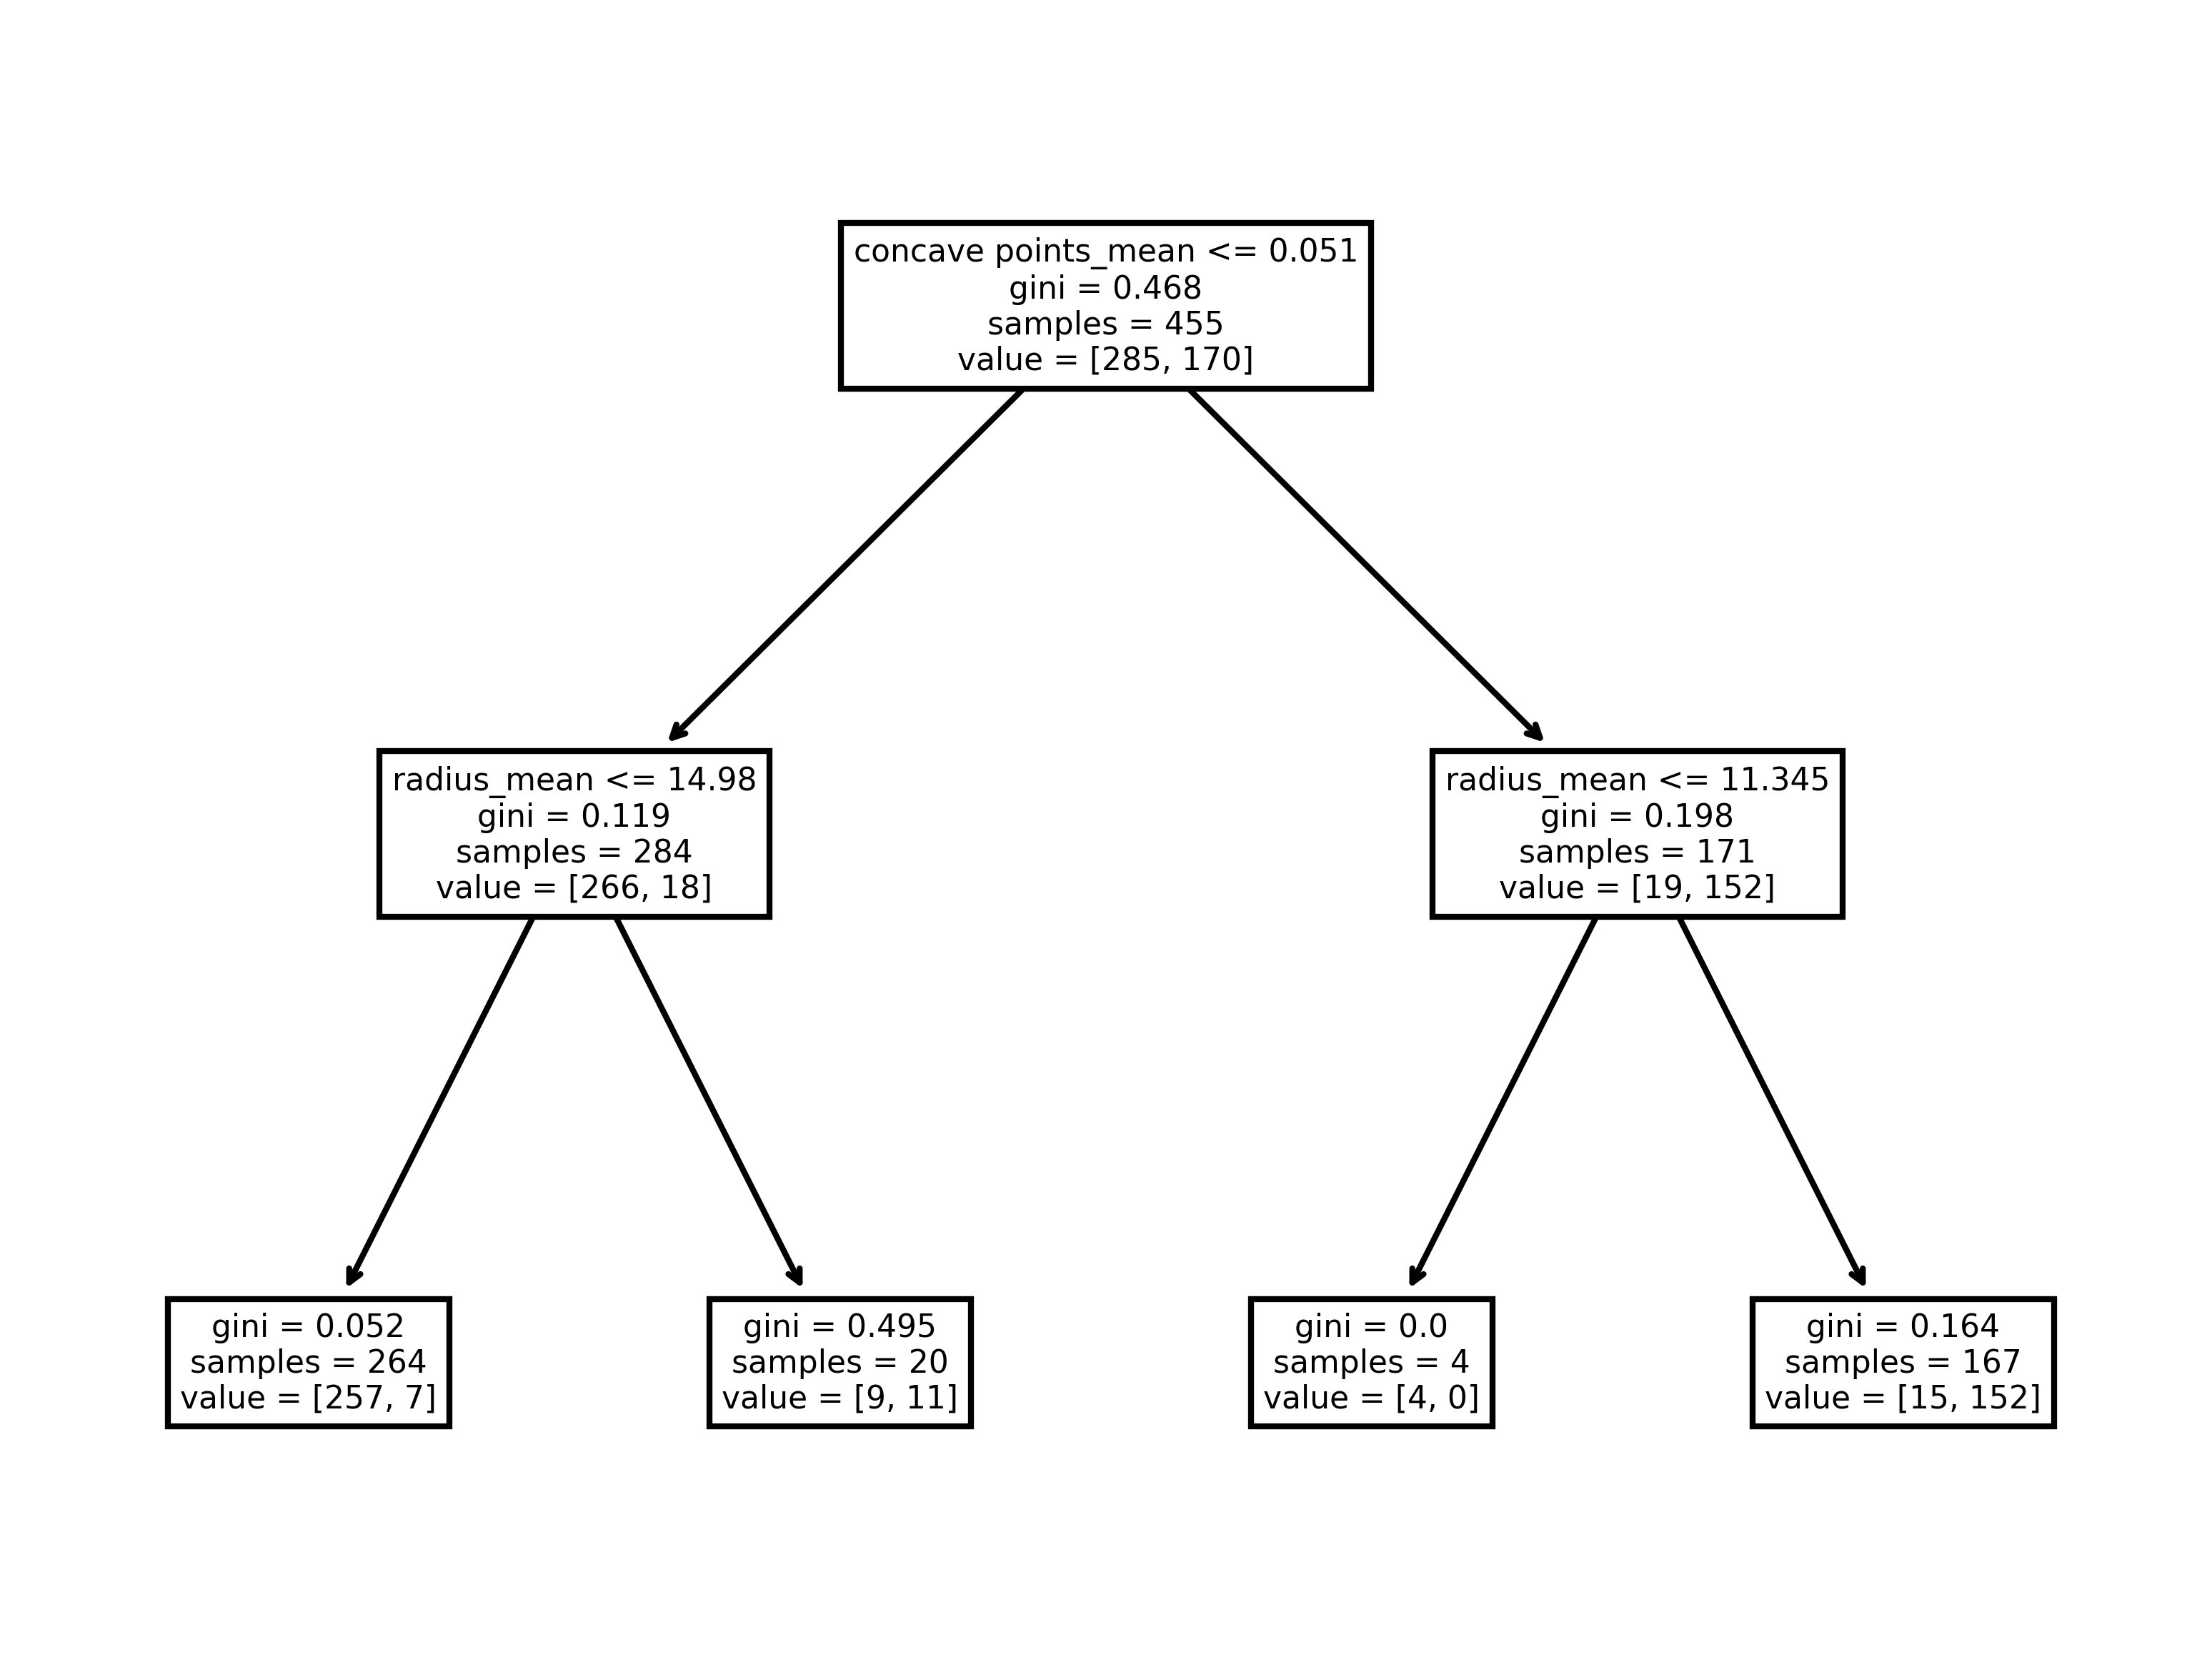

In [40]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(dpi=600)
plot_tree(dt, feature_names = X.columns)
plt.show()

## Information Gain IG

In [43]:
# criterion
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1, stratify=y)
dt = DecisionTreeClassifier(criterion = 'gini', random_state = 1)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
accuracy_score(y_test,y_pred)

0.9210526315789473

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1, stratify=y)
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 1)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
accuracy_score(y_test,y_pred)

0.8947368421052632

# Decision Tree Regressor

In [46]:
auto = pd.read_csv('data/auto.csv')
auto.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


In [74]:
# Xa = auto.drop(['mpg'], axis=1)
Xa = auto[['displ']]
ya = auto['mpg']

In [68]:
Xa.head()

,displ
0,250.0
1,304.0
2,91.0
3,250.0
4,97.0


In [76]:
Xa.shape

(392, 1)

In [77]:
ya.shape

(392,)

<Axes: xlabel='displ', ylabel='mpg'>

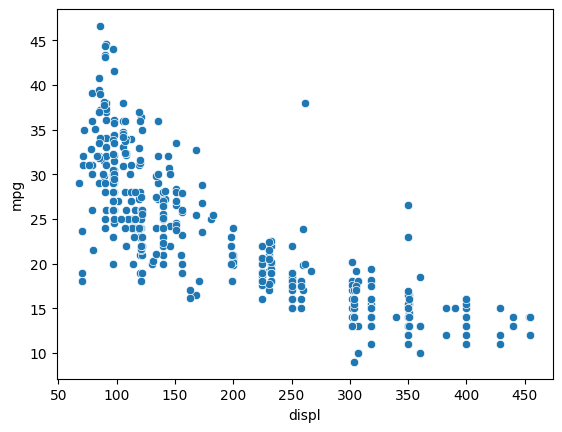

In [75]:
sns.scatterplot(data = auto, x =  'displ', y ='mpg' )

In [82]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

Xa_train,Xa_test,ya_train,ya_test = train_test_split(Xa,ya,test_size=0.2,random_state=3)
dt_a = DecisionTreeRegressor(max_depth = 4,min_samples_leaf = 0.1, random_state = 3)
dt_a.fit(Xa_train,ya_train)
ya_pred = dt_a.predict(Xa_test)
mse_dta = MSE(ya_test,ya_pred)
rmse_dta = mse_dta ** (1/2)
rmse_dta

5.102306888903137

# Generalization Error
- The generalization error of a model tells you how much it generalizes on unseen data.
- Do wysokiego błędu modelu poza próbą treningową może prowadzić zarówno jego nadmierne uproszczenie (wysokie obciążenie), jak i nadmiernie szczegółowa wrażliwość (wysoka wariancja).
- https://www.geeksforgeeks.org/bias-vs-variance-in-machine-learning/

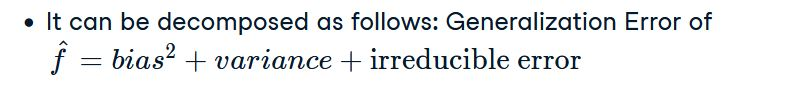

In [83]:
from PIL import Image 
from IPython.display import display
img = Image. open('ge.jpg')
display(img)

1. Bias 
- The bias term tells you, on average, how much f is different that the correct function on trained data. 
- High bias models lead to underfitting.

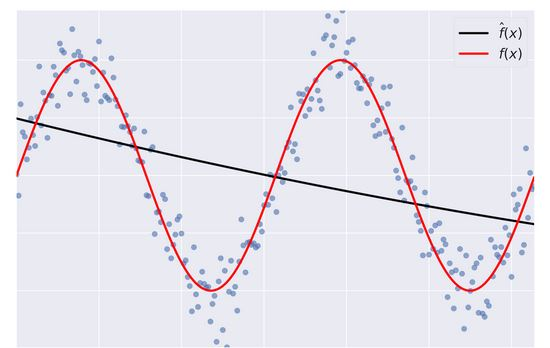

In [86]:
from PIL import Image 
from IPython.display import display
img = Image. open('under.jpg')
display(img)
# red the correct function, f the one we have - overfitted or underfitted

2. Variance
- The variance term tells you how much f is inconsistent over different training sets.
- High variance models lead to overfitting. 

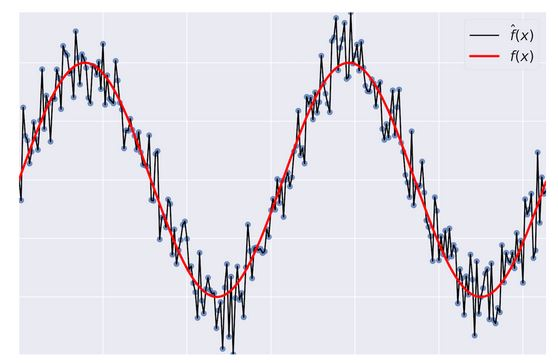

In [85]:
from PIL import Image 
from IPython.display import display
img = Image. open('over.jpg')
display(img)

3. Irreducible error
- The error contribution of noise.

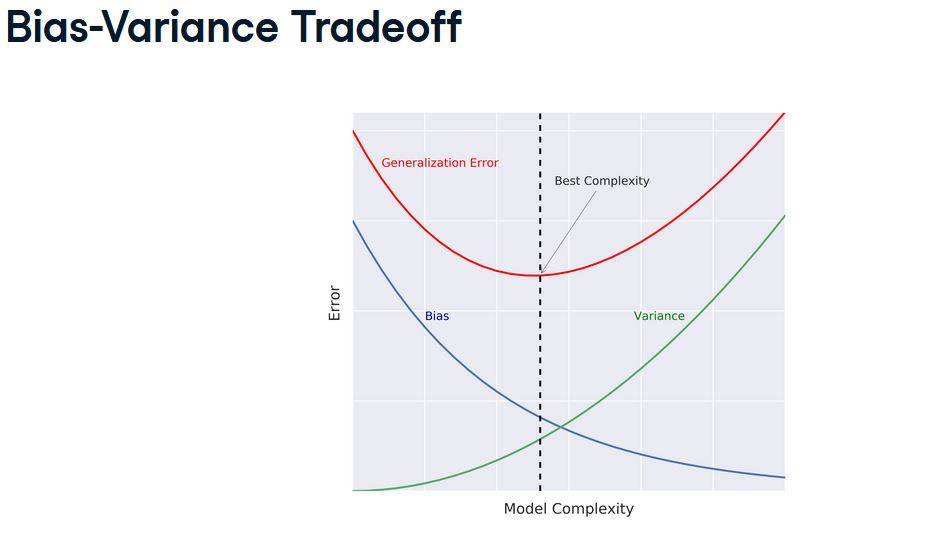

In [88]:
from PIL import Image 
from IPython.display import display
img = Image. open('bias.jpg')
display(img)

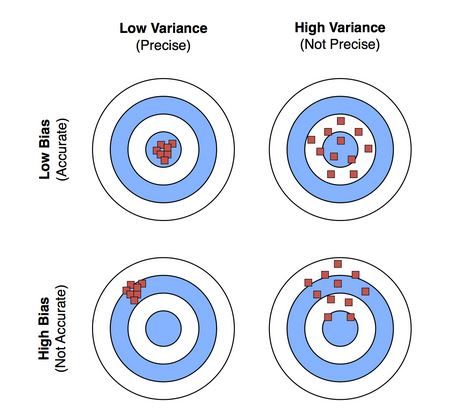

In [89]:
from PIL import Image 
from IPython.display import display
img = Image. open('bv.jpg')
display(img)

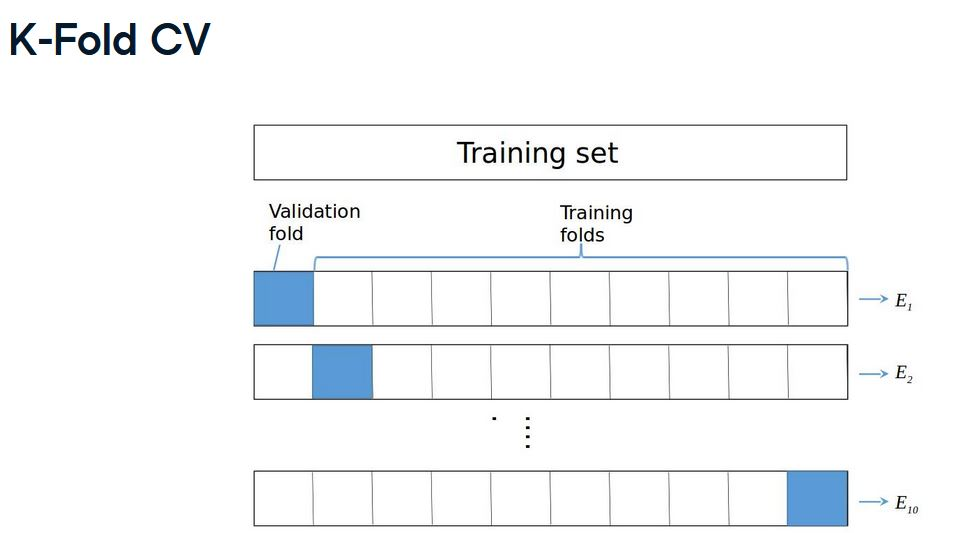

In [1]:
from PIL import Image 
from IPython.display import display
img = Image. open('kfold.jpg')
display(img)

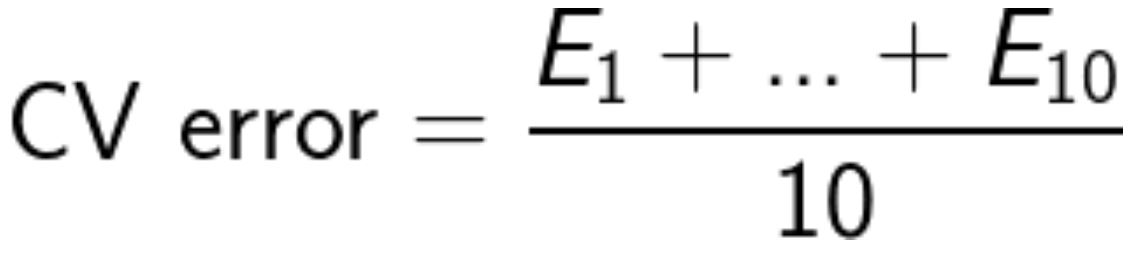

In [2]:
from PIL import Image 
from IPython.display import display
img = Image. open('cverror.jpg')
display(img)

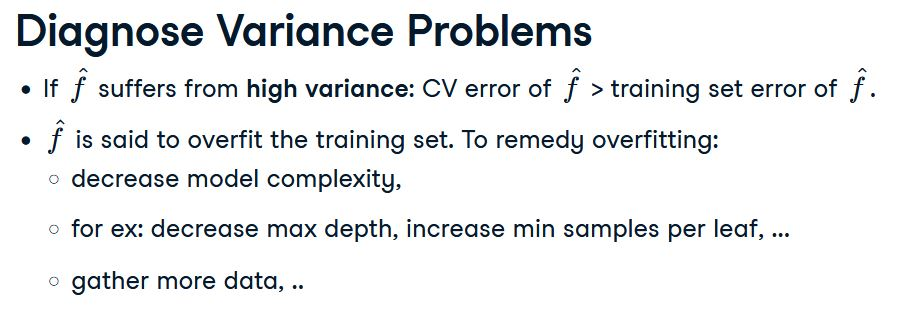

In [4]:
from PIL import Image 
from IPython.display import display
img = Image. open('var.jpg')
display(img)

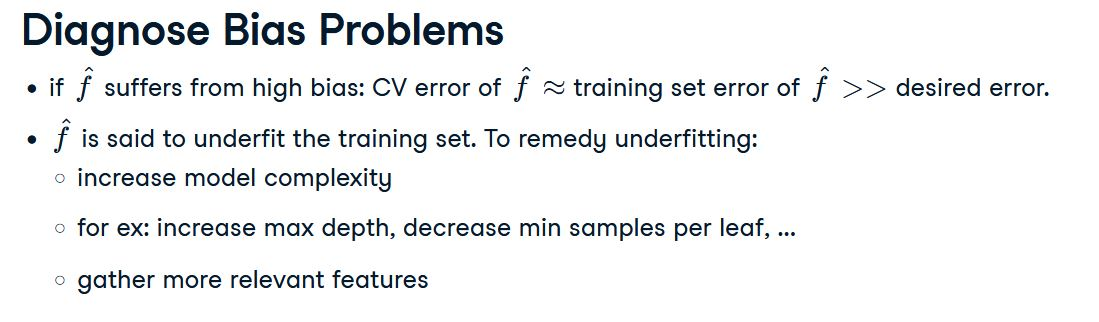

In [3]:
from PIL import Image 
from IPython.display import display
img = Image. open('biasa.jpg')
display(img)

In [14]:
from sklearn.model_selection import cross_val_score, KFold
import pandas as pd

auto = pd.read_csv('data/auto.csv')
auto.head()
Xa = auto[['displ']]
ya = auto['mpg']

SEED = 123

Xa_train,Xa_test,ya_train,ya_test = train_test_split(Xa,ya,test_size=0.3,random_state=SEED)
dt_a = DecisionTreeRegressor(max_depth = 4,min_samples_leaf = 0.14, random_state = SEED)

# Finally, set n_jobs to -1 to exploit all available CPUs in computation
MSE_CV = -cross_val_score(dt_a, Xa_train,ya_train, cv = 10, scoring = 'neg_mean_squared_error',
                         n_jobs = -1)


dt_a.fit(Xa_train,ya_train)
ya_pred_train = dt_a.predict(Xa_train)
ya_pred_test = dt_a.predict(Xa_test)

print('CV MSE: {:.2f}'.format(MSE_CV.mean()))
print('Train MSE: {:.2f}'.format(MSE(ya_train,ya_pred_train)))
print('Test MSE: {:.2f}'.format(MSE(ya_test,ya_pred_test)))

CV MSE: 19.94
Train MSE: 17.89
Test MSE: 20.41


 Given that the training set error is smaller than the CV-error, we can deduce that dt overfits the training set and that it suffers from high variance. Notice how the CV and test set errors are roughly equal. 

# Ensemble Learning

In [16]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier 
from sklearn.linear_model import LogisticRegression

wbc = pd.read_csv('data/wbc.csv')
wbc.head()
X = wbc[['radius_mean', 'concave points_mean']]
y = wbc['diagnosis']

SEED = 1 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=SEED)

lr = LogisticRegression(random_state = SEED)
dt = DecisionTreeClassifier(random_state = SEED)
knn = KNN()

classifiers = [('Logistic Regression', lr),
              ('K Nearest Neighbors', knn),
              ('Classification Tree', dt)]

for clf_name, clf in classifiers:
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print('{:s} : {:.3f}'.format(clf_name, accuracy_score(y_test,y_pred)))

Logistic Regression : 0.848
K Nearest Neighbors : 0.883
Classification Tree : 0.901


In [17]:
vc = VotingClassifier(estimators = classifiers)
vc.fit(X_train,y_train)
y_pred = vc.predict(X_test)
print('Voting Classifier: {:.3f}'.format( accuracy_score(y_test,y_pred)))

Voting Classifier: 0.895


# Bagging =  bootstrap aggregation

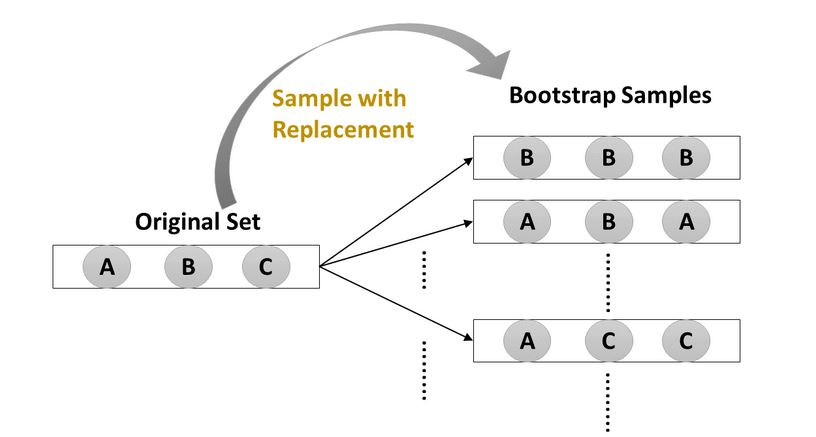

In [18]:
from PIL import Image 
from IPython.display import display
img = Image. open('boot.jpg')
display(img)

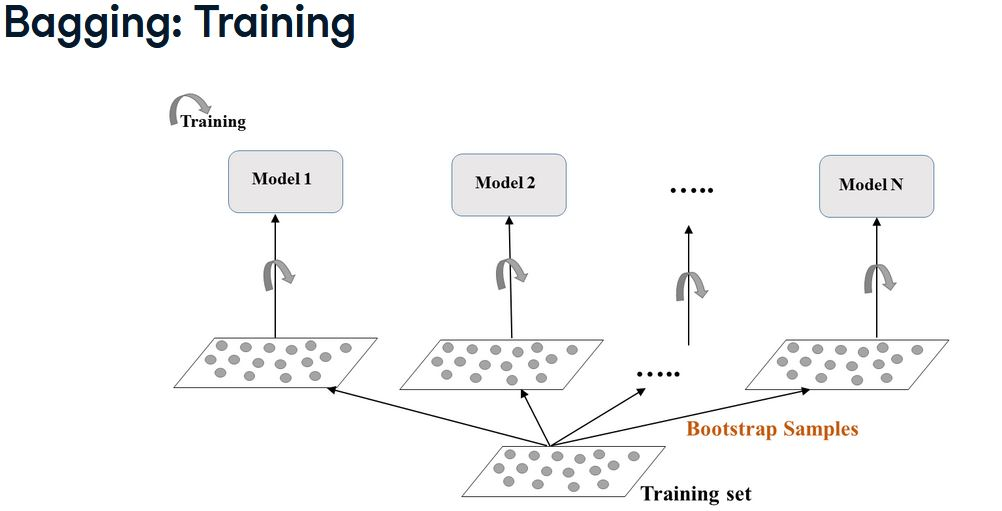

In [19]:
from PIL import Image 
from IPython.display import display
img = Image. open('tr.jpg')
display(img)

In [25]:
from sklearn.ensemble import BaggingClassifier 

wbc = pd.read_csv('data/wbc.csv')
wbc.head()
X = wbc[['radius_mean', 'concave points_mean']]
y = wbc['diagnosis']

SEED = 1 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=SEED, stratify =y)

dt = DecisionTreeClassifier(max_depth =4, min_samples_leaf = 0.16, random_state = SEED)
bc = BaggingClassifier(base_estimator = dt, n_estimators = 300, n_jobs =-1 )

bc.fit(X_train,y_train)
y_pred = bc.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy of Bagging Classifier: {:.3f}'.format(accuracy))

C:\Users\AsusF512ua-ej269t\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy of Bagging Classifier: 0.877


## Out of Bag Evaluation
- some instances may be sampled several times for one model
- other instance may not be sampled at all

- On average, for each model, 63% of the training instances are sampled
- The remaining 37% that are not sampled constitute what is known as the Out-of-bag or OOB instances.

- OOB can be used to estimate the performance of the ensemble without the need for cross-validation

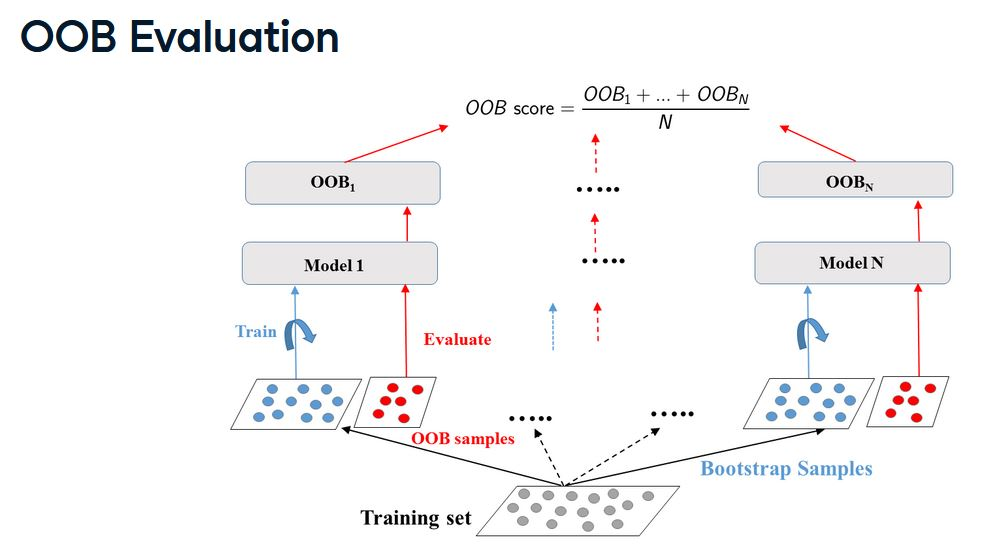

In [26]:
from PIL import Image 
from IPython.display import display
img = Image. open('obb.jpg')
display(img)

In [28]:
wbc = pd.read_csv('data/wbc.csv')
wbc.head()
X = wbc[['radius_mean', 'concave points_mean']]
y = wbc['diagnosis']

SEED = 1 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=SEED, stratify =y)

dt = DecisionTreeClassifier(max_depth =4, min_samples_leaf = 0.16, random_state = SEED)
bc = BaggingClassifier(base_estimator = dt, n_estimators = 300, oob_score = True, n_jobs =-1 )

bc.fit(X_train,y_train)
y_pred = bc.predict(X_test)

test_accuracy = accuracy_score(y_test,y_pred)
oob_accuracy = bc.oob_score_
print('Test set accuracy: {:.3f}'.format(test_accuracy))
print('OOB accuracy: {:.3f}'.format(oob_accuracy))

C:\Users\AsusF512ua-ej269t\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Test set accuracy: 0.877
OOB accuracy: 0.910


# Random Forests
- In Random Forests, each estimator is trained on a different bootstrap sample having the same size as the training set. 
- Random forests introduces further randomization than bagging when training each of the base estimators. 
- When each tree is trained, only d features can be sampled at each node without replacement, where d is a number smaller than the total number of features. 

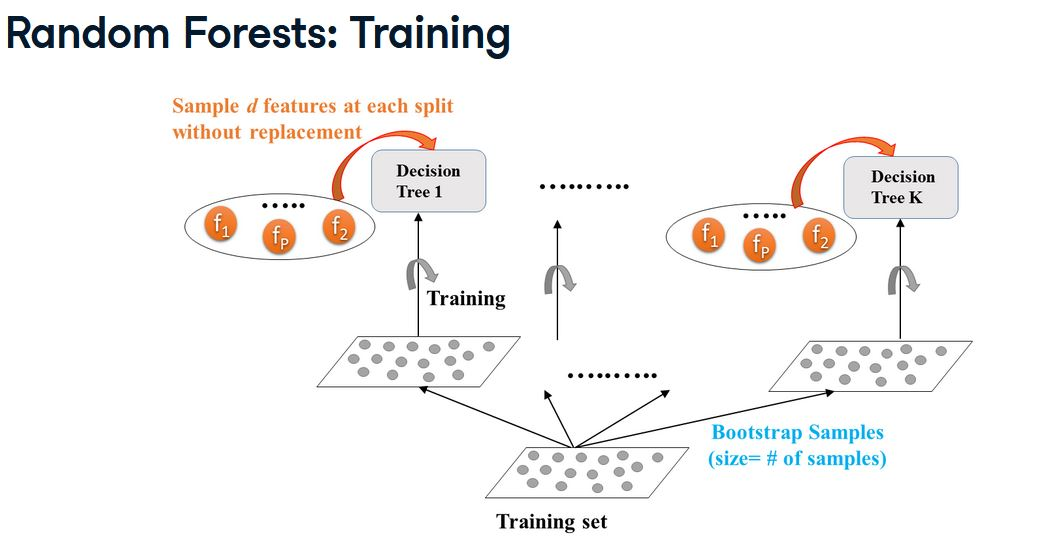

In [29]:
from PIL import Image 
from IPython.display import display
img = Image. open('rf.jpg')
display(img)

In [37]:
from sklearn.ensemble import RandomForestRegressor 

auto = pd.read_csv('data/auto.csv')
auto.head()
X = auto.drop(['mpg', 'origin'], axis = 1)
y = auto['mpg']

SEED = 1 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=SEED)

rf = RandomForestRegressor( n_estimators = 400, min_samples_leaf = 0.12, random_state = SEED)


rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

rmse_test = MSE(y_test,y_pred)**(1/2)
print('Test set RMSE of rf: {:.3f}'.format(rmse_test))

Test set RMSE of rf: 3.978


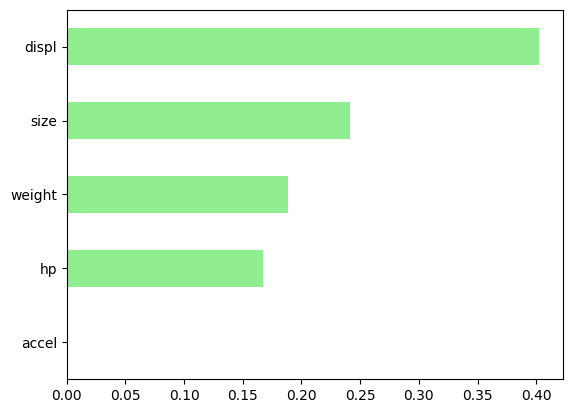

In [39]:
importances_rf = pd.Series(rf.feature_importances_, index = X.columns)
sorted_importances_rf=importances_rf.sort_values()
sorted_importances_rf.plot(kind = 'barh', color = 'lightgreen')
plt.show()

- In scikit-learn, feature importance is assessed by measuring how much the tree nodes use a particular feature to reduce impurity.
- Note that the importance of a feature is expressed as a percentage indicating the weight of that feature in training and prediction.

# Boosting
- Boosting refers to an ensemble method in which many predictors are trained and each predictor learns from the errors of its predecessor.

## AdaBoost 
- In AdaBoost, each predictor pays more attention to the instances wrongly predicted by its predecessor by constantly changing the weights of training instances. 
- Furthermore, each predictor is assigned a coefficient alpha that weighs its contribution in the ensemble's final prediction. Alpha depends on the predictor's training error. 

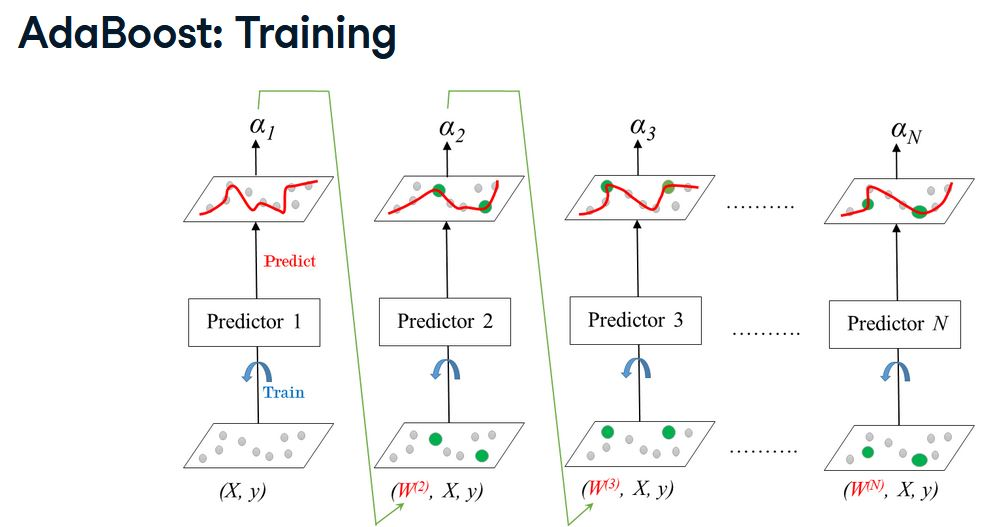

In [40]:
from PIL import Image 
from IPython.display import display
img = Image. open('ada.jpg')
display(img)

- First, predictor1 is trained on the initial dataset (X,y), and the training error for predictor1 is determined. This error can then be used to determine alpha1 which is predictor1's coefficient. 
- Alpha1 is then used to determine the weights W(2) of the training instances for predictor2. 
- Notice how the incorrectly predicted instances shown in green acquire higher weights. When the weighted instances are used to train predictor2, this predictor is forced to pay more attention to the incorrectly predicted instances.
- eta. Eta is a number between 0 and 1; it is used to shrink the coefficient alpha of a trained predictor.

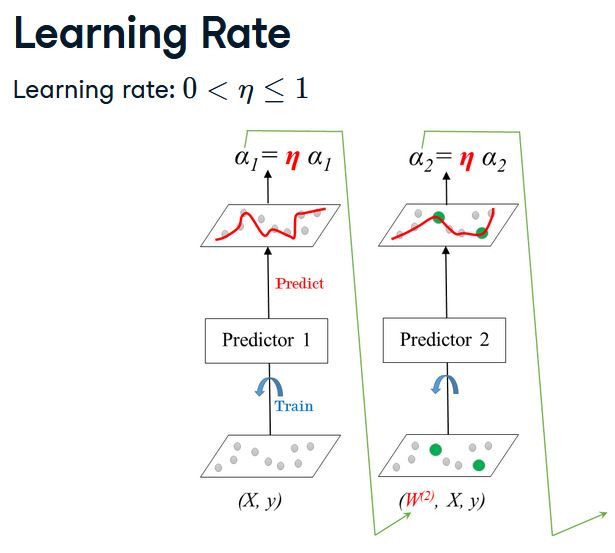

In [41]:
from PIL import Image 
from IPython.display import display
img = Image. open('eta.jpg')
display(img)

In [50]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score

wbc = pd.read_csv('data/wbc.csv')
wbc.head()
X = wbc[['radius_mean', 'concave points_mean']]
y = wbc['diagnosis']

SEED = 1 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=SEED, stratify =y)

dt = DecisionTreeClassifier(max_depth =1, random_state = SEED)
adb_clf = AdaBoostClassifier(base_estimator = dt, n_estimators = 100)

adb_clf.fit(X_train,y_train)
# probability of prediction M
y_pred_proba = adb_clf.predict_proba(X_test)[:,1]
y_pred = adb_clf.predict(X_test)

adb_clf_roc_auc_score = roc_auc_score(y_test,y_pred_proba)
print('ROC AUC score: {:.2f}'.format(adb_clf_roc_auc_score))

C:\Users\AsusF512ua-ej269t\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


ROC AUC score: 0.96


## Gradient Boosting

- each predictor in the ensemble corrects its predecessor's error
- each predictor is trained using the residual errors of its predecessor as labels

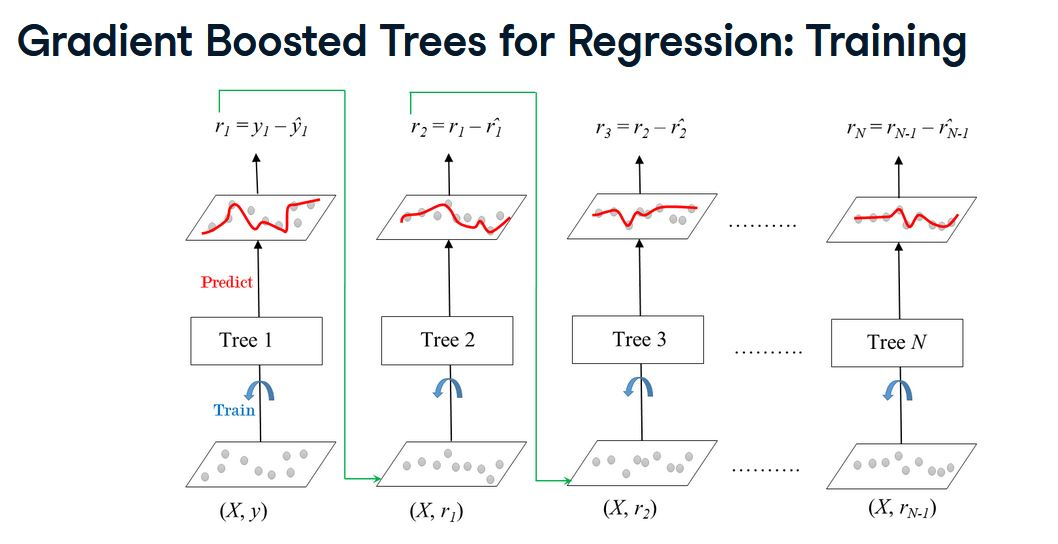

In [53]:
from PIL import Image 
from IPython.display import display
img = Image. open('gb.jpg')
display(img)

- The ensemble consists of N trees. 
- Tree1 is trained using the features matrix X and the dataset labels y. 
- The predictions labeled y1hat are used to determine the training set residual errors r1. 
- Tree2 is then trained using the features matrix X and the residual errors r1 of Tree1 as labels.

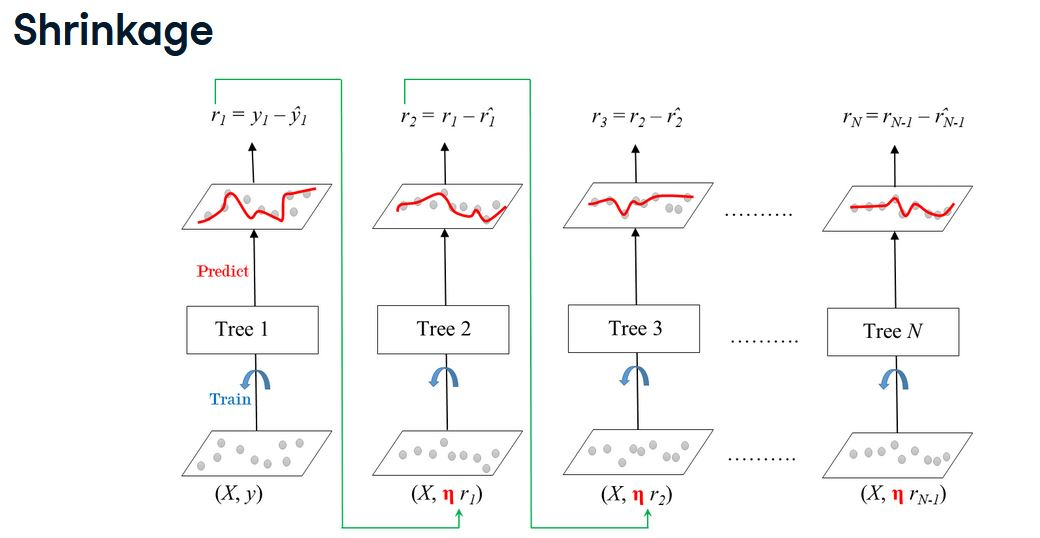

In [55]:
from PIL import Image 
from IPython.display import display
img = Image. open('shrink.jpg')
display(img)

- ch tree in the ensemble is shrinked after it is multiplied by a learning rate eta which is a number between 0 and 1

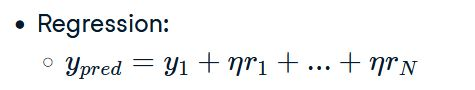

In [56]:
from PIL import Image 
from IPython.display import display
img = Image. open('formula.jpg')
display(img)

In [57]:
from sklearn.ensemble import GradientBoostingRegressor

auto = pd.read_csv('data/auto.csv')
auto.head()
X = auto.drop(['mpg', 'origin'], axis = 1)
y = auto['mpg']

SEED = 1 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=SEED)

gbt = GradientBoostingRegressor( n_estimators = 300, max_depth = 1, random_state = SEED)


gbt.fit(X_train,y_train)
y_pred = gbt.predict(X_test)

rmse_test = MSE(y_test,y_pred)**(1/2)
print('Test set RMSE of rf: {:.3f}'.format(rmse_test))

Test set RMSE of rf: 4.083


Disadvantage:
-  Each tree in the ensemble is trained to find the best split-points and the best features. This procedure may lead to CARTs that use the same split-points and possibly the same features. 

## Stochastic Gradient Boosting (SGB)

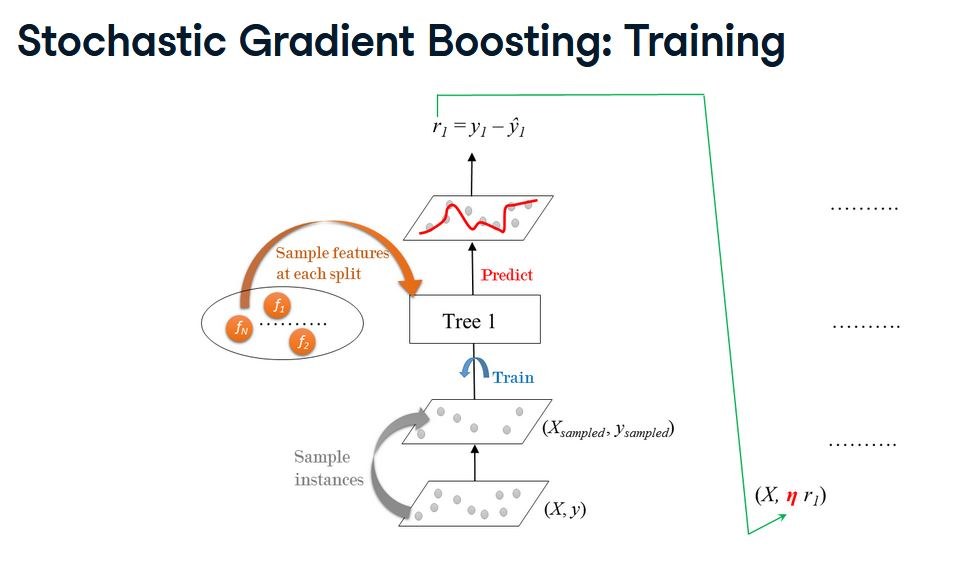

In [1]:
from PIL import Image 
from IPython.display import display
img = Image. open('sgb.jpg')
display(img)

-  First, instead of providing all the training instances to a tree, only a fraction of these instances are provided through sampling without replacement. 
- The sampled data is then used for training a tree. 
- However, not all features are considered when a split is made. Instead, only a certain randomly sampled fraction of these features are used for this purpose. 
- Once a tree is trained, predictions are made and the residual errors can be computed. These residual errors are multiplied by the learning rate eta and are fed to the next tree in the ensemble. T

In [5]:
from sklearn.ensemble import GradientBoostingRegressor

auto = pd.read_csv('data/auto.csv')
auto.head()
X = auto.drop(['mpg', 'origin'], axis = 1)
y = auto['mpg']

SEED = 1 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=SEED)

sgbt = GradientBoostingRegressor( subsample = 0.8, max_features = 0.2, n_estimators = 300, max_depth = 1, random_state = SEED)


sgbt.fit(X_train,y_train)
y_pred = sgbt.predict(X_test)

rmse_test = MSE(y_test,y_pred)**(1/2)
print('Test set RMSE of rf: {:.3f}'.format(rmse_test))

Test set RMSE of rf: 4.282


# Tuning a CART's Hyperparameters
- GridSearch
- Random Search
- Bayesian Optimization
- Genetic Algorithms

## Grid search cross validation

In [ ]:
max_depth = {2,3,4}
min_samples_leaf = {0.05, 0.1}

In [7]:
from sklearn.tree import DecisionTreeClassifier
SEED = 1
dt = DecisionTreeClassifier(random_state = SEED)
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

wbc = pd.read_csv('data/wbc.csv')
wbc.head()
X = wbc[['radius_mean', 'concave points_mean']]
y = wbc['diagnosis']

params_dt = {
            'max_depth': [3, 4, 5, 6],
            'min_samples_leaf': [0.04, 0.06, 0.08],
            'max_features': [0.2,0.4,0.6,0.8]
            }

SEED = 1 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=SEED, stratify =y)

dt = DecisionTreeClassifier(random_state = SEED)
grid_dt = GridSearchCV(estimator = dt,
                      param_grid =params_dt,
                      scoring = 'accuracy',
                      cv = 10,
                      n_jobs = -1)

grid_dt.fit(X_train,y_train)
best_hyperparams = grid_dt.best_params_
print('Best hyperparams: \n', best_hyperparams)

best_CV_score = grid_dt.best_score_
print('Best CV score: \n', best_CV_score)

best_model = grid_dt.best_estimator_
print('Best model: \n', best_model)

test_ac = best_model.score(X_test, y_test)
print('Test set accuracy of the best model: \n', test_ac)

Best hyperparams: 
 {'max_depth': 3, 'max_features': 0.2, 'min_samples_leaf': 0.06}
Best CV score: 
 0.9099999999999999
Best model: 
 DecisionTreeClassifier(max_depth=3, max_features=0.2, min_samples_leaf=0.06,
                       random_state=1)
Test set accuracy of the best model: 
 0.9035087719298246


In [19]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor 
import pandas as pd

auto = pd.read_csv('data/auto.csv')
auto.head()
Xa = auto[['displ']]
ya = auto['mpg']

SEED = 1

Xa_train,Xa_test,ya_train,ya_test = train_test_split(Xa,ya,test_size=0.2,random_state=SEED)
rf = RandomForestRegressor(random_state = SEED)

params_dt = {
            'n_estimators': [300, 400, 500],
            'max_depth': [4,6,8],
            'min_samples_leaf': [0.04, 0.06, 0.08],
            'max_features': ['log2', 'sqrt']
            }

# verbose - messages printed during fitting
grid_dt = GridSearchCV(estimator = rf,
                       param_grid =params_dt,
                       scoring = 'neg_mean_squared_error',
                       verbose = 1,
                       cv = 3,
                       n_jobs = -1)



grid_dt.fit(Xa_train,ya_train)
best_hyperparams = grid_dt.best_params_
print('Best hyperparams: \n', best_hyperparams)

best_CV_score = grid_dt.best_score_
print('Best CV score: \n', best_CV_score)

best_model = grid_dt.best_estimator_
print('Best model: \n', best_model)

y_pred = best_model.predict(Xa_test)
rmse_test = MSE(ya_test,y_pred)**(1/2)
print('Test set RMSE of rf: {:.3f}'.format(rmse_test))

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best hyperparams: 
 {'max_depth': 6, 'max_features': 'log2', 'min_samples_leaf': 0.04, 'n_estimators': 500}
Best CV score: 
 -17.281547666891345
Best model: 
 RandomForestRegressor(max_depth=6, max_features='log2', min_samples_leaf=0.04,
                      n_estimators=500, random_state=1)
Test set RMSE of rf: 4.480
